# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

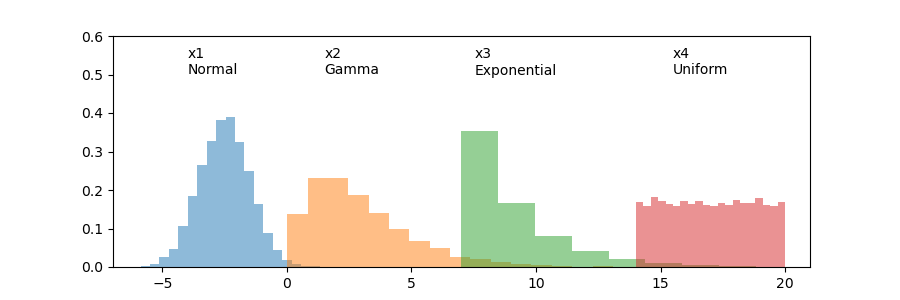

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

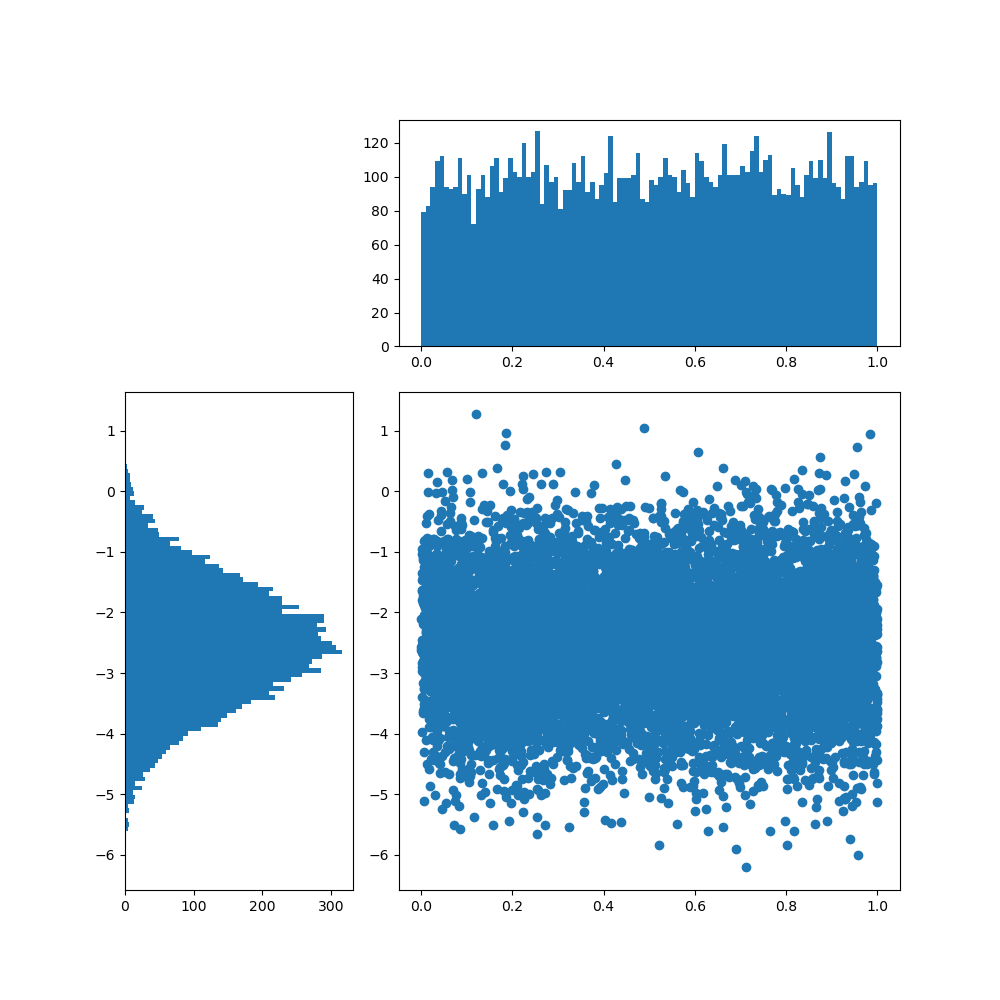

In [3]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)
Y = np.random.normal(-2.5, 1, 10000)
X = np.random.random(size=10000)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');


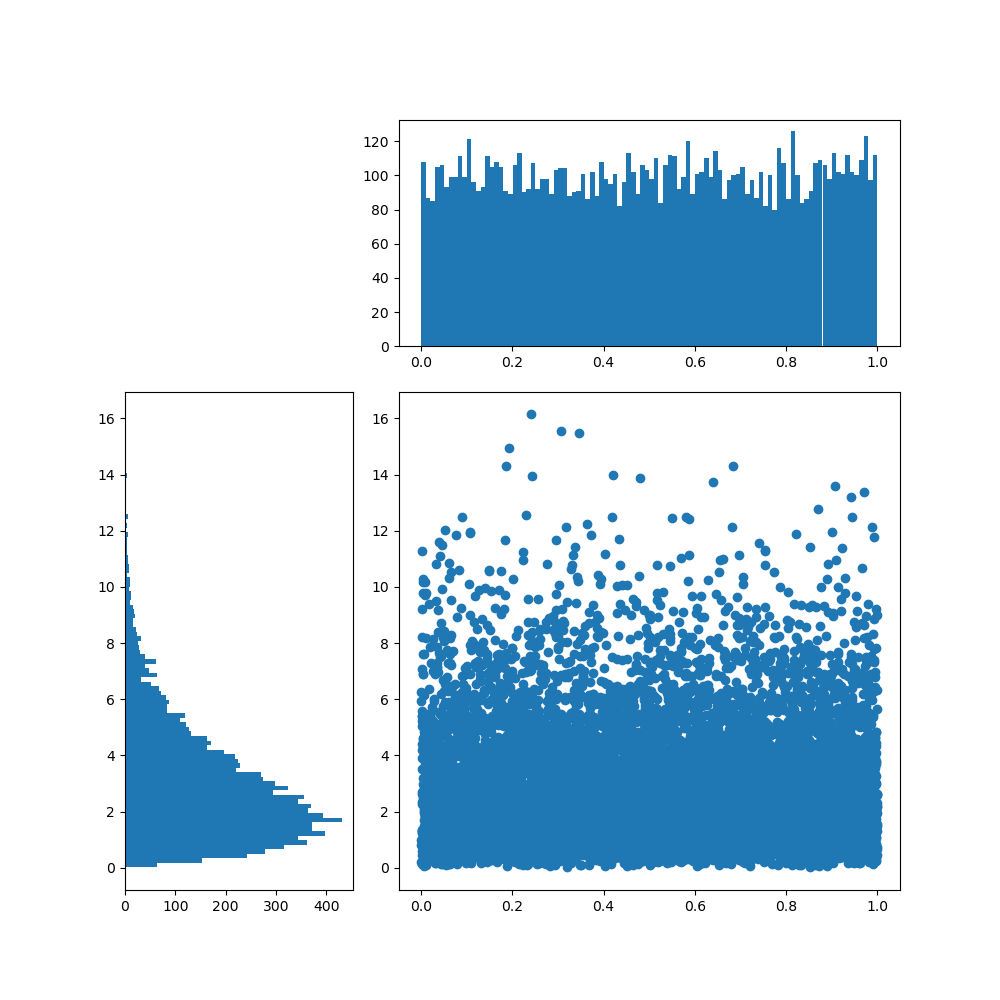

In [4]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)
Y = np.random.gamma(2, 1.5, 10000)
X = np.random.random(size=10000)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

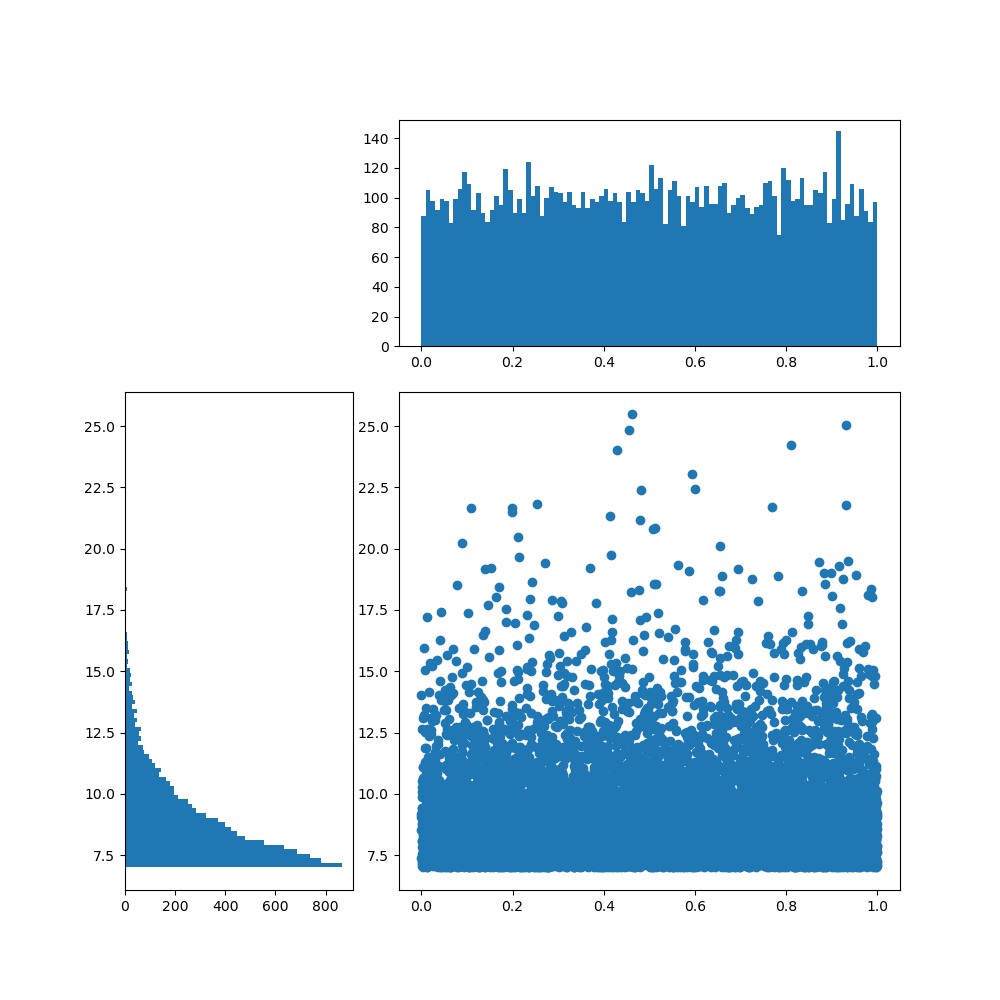

In [5]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)
Y = np.random.exponential(2, 10000)+7
X = np.random.random(size=10000)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

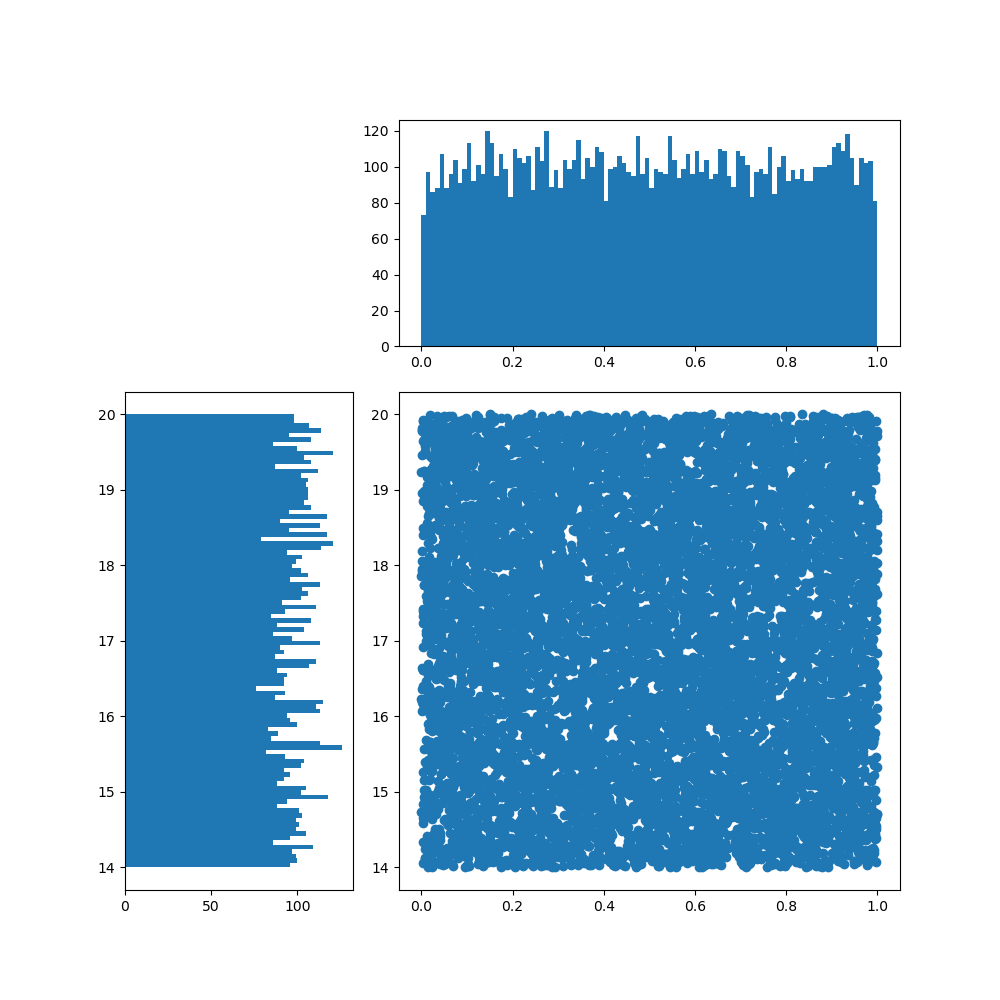

In [6]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)
Y = np.random.uniform(14,20, 10000)
X = np.random.random(size=10000)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal');

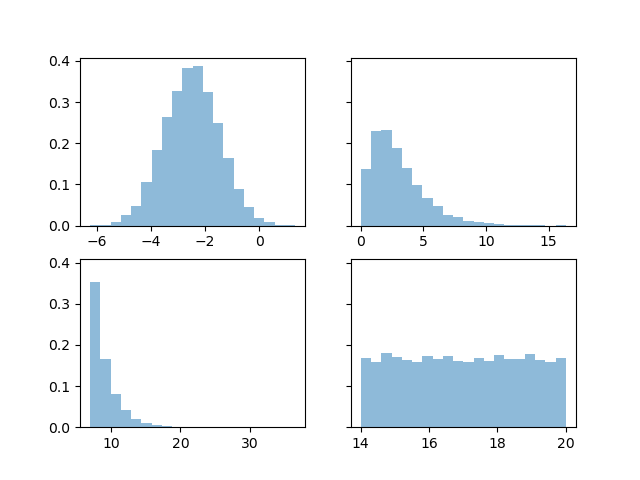

In [9]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=False, sharey=True)
axs = [ax1,ax2,ax3,ax4]
data_set = [x1,x2,x3,x4]
for idx, ax in enumerate(axs):
    _ = ax.hist(data_set[idx], density=True, bins=20, alpha=0.5)

In [10]:
def update_single(curr, dataset, type_of_distri):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr >= n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-6, 20, 1)
    plt.hist(dataset[:curr], bins=bins)
    plt.axis([-6,20,0,30])
    plt.gca().set_title('Sampling the {} Distribution'.format(type_of_distri))
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [16,27])

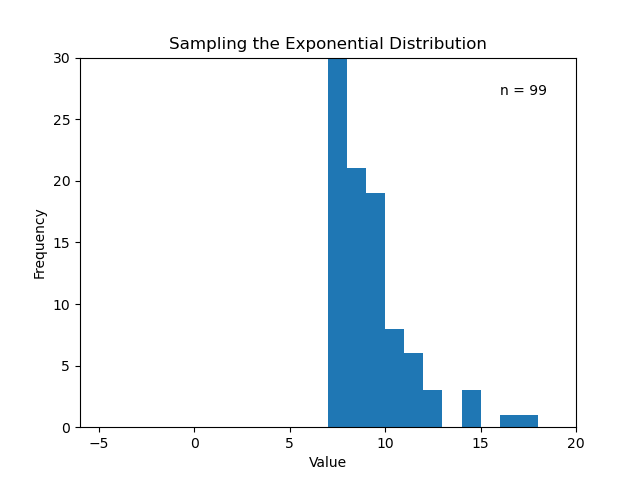

In [17]:
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
fig = plt.figure()
n=np.random.randint(100, 1000, )
type_distri = ['Normal', 'Gamma', 'Exponential', 'Uniform']
data_set = [x1, x2, x3, x4]

a = animation.FuncAnimation(fig, update_single, fargs=[data_set[2], type_distri[2]], interval=1, repeat=False)
a.save('animation.gif', writer='pillow')

0

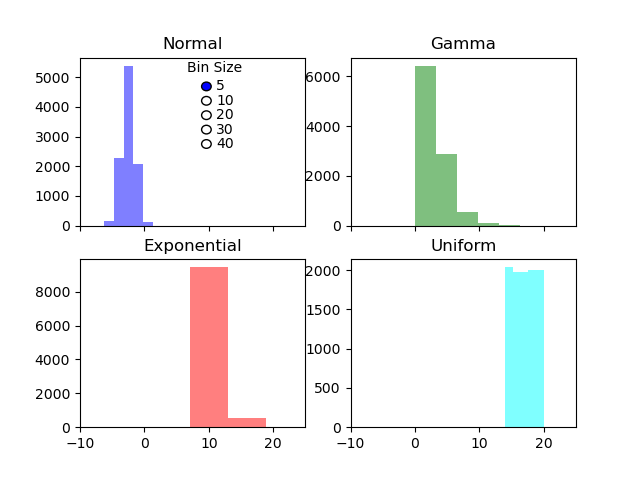

In [16]:
from matplotlib.widgets import RadioButtons

# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

type_distri = ['Normal', 'Gamma', 'Exponential', 'Uniform']
data_set = [x1, x2, x3, x4]
my_color = ['blue', 'green', 'red', 'cyan']

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for idx, ax in enumerate(axs):
    ax.hist(data_set[idx], bins=5, alpha=0.5, color=my_color[idx])
    ax.set_title('{}'.format(type_distri[idx]))

plt.xlim(-10, 25)

# define radio button and text
rax = plt.axes([0.3, .67, .15, .18], frameon=False)
radio = RadioButtons(rax, (5, 10, 20, 30, 40))
plt.text(-.05, 1.0, 'Bin Size', fontsize=10)

# update function
def update_radio(label):
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(data_set[i], bins=int(radio.value_selected), alpha=0.5, color=my_color[i])
        axs[i].set_title('{}'.format(type_distri[i]))
        if i in [0,1]:
            axs[i].tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    
radio.on_clicked(update_radio)